In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/hotel_bookings.csv')
data.shape

(119390, 32)

In [2]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [3]:
label=['is_canceled']
feature = ['hotel','is_canceled','lead_time','Direct(bool)','precancel(bool)','prebook(bool)','change_room(bool)','reserve_change(bool)', 'parkinglot(bool)','special_request(bool)','customer_type(label)']

## feature 컬럼 전처리

In [4]:
# Direct/non direct
data.loc[data["distribution_channel"]=='Direct', 'Direct(bool)'] = 1
data.loc[data["distribution_channel"]!='Direct', 'Direct(bool)'] = 0

#previous_cancel = 0 or <0
data['precancel(bool)'] = 1
data.loc[data['previous_cancellations'] == 0, 'precancel(bool)'] = 0

#previous_book_not_cancel = 0 or <0
data['prebook(bool)'] = 1
data.loc[data['previous_bookings_not_canceled'] == 0, 'prebook(bool)'] = 0

#change_room (방이 바뀌었으면 1)
data['change_room(bool)'] = 0
data.loc[data['assigned_room_type'] != data['reserved_room_type'], 'change_room(bool)'] = 1

#예약 사항 변경(booking changes =0 or <0)
data['reserve_change(bool)'] = 0
data.loc[data['previous_cancellations'] > 0, 'reserve_change(bool)'] = 1 

#주차 공간 요구
data.loc[data['required_car_parking_spaces'] == 0, 'parkinglot(bool)'] = 0
data.loc[data['required_car_parking_spaces'] > 0,'parkinglot(bool)'] = 1

#특별 요청 사항 요구
data.loc[data['total_of_special_requests'] == 0, 'special_request(bool)'] = 0
data.loc[data['total_of_special_requests'] > 0,'special_request(bool)'] = 1

#customer type 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data["customer_type"])
label_encoded = le.transform(data["customer_type"])
data["customer_type(label)"] = label_encoded.reshape((-1, 1))

In [5]:
ml_data = data[feature]
ml_data

,hotel,is_canceled,lead_time,Direct(bool),precancel(bool),prebook(bool),change_room(bool),reserve_change(bool),parkinglot(bool),special_request(bool),customer_type(label)
0,Resort Hotel,0,342,1.0,0,0,0,0,0.0,0.0,2
1,Resort Hotel,0,737,1.0,0,0,0,0,0.0,0.0,2
2,Resort Hotel,0,7,1.0,0,0,1,0,0.0,0.0,2
3,Resort Hotel,0,13,0.0,0,0,0,0,0.0,0.0,2
4,Resort Hotel,0,14,0.0,0,0,0,0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,0.0,0,0,0,0,0.0,0.0,2
119386,City Hotel,0,102,0.0,0,0,0,0,0.0,1.0,2
119387,City Hotel,0,34,0.0,0,0,0,0,0.0,1.0,2
119388,City Hotel,0,109,0.0,0,0,0,0,0.0,0.0,2


In [6]:
ml_resort_data = ml_data[ml_data["hotel"]=="Resort Hotel"]
ml_city_data = ml_data[ml_data["hotel"]=="City Hotel"]

In [7]:
ml_resort_data = ml_resort_data.drop(['hotel'], axis=1)
ml_city_data = ml_city_data.drop(['hotel'], axis=1)
ml_city_data = ml_city_data.reset_index(drop=True)

In [8]:
ml_resort_data

,is_canceled,lead_time,Direct(bool),precancel(bool),prebook(bool),change_room(bool),reserve_change(bool),parkinglot(bool),special_request(bool),customer_type(label)
0,0,342,1.0,0,0,0,0,0.0,0.0,2
1,0,737,1.0,0,0,0,0,0.0,0.0,2
2,0,7,1.0,0,0,1,0,0.0,0.0,2
3,0,13,0.0,0,0,0,0,0.0,0.0,2
4,0,14,0.0,0,0,0,0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
40055,0,212,0.0,0,0,0,0,0.0,0.0,2
40056,0,169,1.0,0,0,0,0,0.0,1.0,3
40057,0,204,1.0,0,0,0,0,0.0,1.0,2
40058,0,211,0.0,0,0,0,0,0.0,1.0,0


# RANDOM FOREST CLASSIFER 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## city hotel

In [10]:
x = ml_city_data.drop("is_canceled", 1)
y = ml_city_data.loc[:,['is_canceled']]

In [11]:
#인스턴스

rf = RandomForestClassifier()
# 파라미터 (n_estimators = 100,                              
# min_samples_leaf = 8,
# min_samples_split = 8,
# random_state = 0,
# n_jobs = -1
# n_estimators= 500, criterion='entropy',max_depth=4

#셋분리
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#적합화
rf.fit(x_train,y_train)


<ipython-input-11-9ed5a6668db9>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [12]:
#예측
y_pred = rf.predict(x_test)

#확률
y_proba= rf.predict_proba(x_test)

In [13]:
# 분류모델평가: 정확도, 재현율, 정밀도, f1-점수와 roc_auc 점수
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score
print(f"accuracy_score(정확도):{accuracy_score(y_test, y_pred)}")
print(f"recall_score(재현율):{recall_score(y_test, y_pred)}")
print(f"precision_score(정밀도):{precision_score(y_test, y_pred)}")
print(f"f1_score(f1점수):{f1_score(y_test, y_pred)}")
print(f"roc_auc_score:{roc_auc_score(y_test, y_pred)}")  #0.5면 랜덤예측 1.0이면 완벽예측


accuracy_score(정확도):0.8027858313374512
recall_score(재현율):0.7188779378316906
precision_score(정밀도):0.7880651595744681
f1_score(f1점수):0.7518832765046387
roc_auc_score:0.790676160157351


In [14]:
print(confusion_matrix(y_test, y_pred))

[[7996 1275]
 [1854 4741]]


In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

#설명력 R2 : 얼마나 잘 설명하느냐 ? 
print(r2_score(y_test, y_pred))

#예측력 MSE 
print(mean_squared_error(y_test, y_pred))

# RMSE 예측력 : 해석을 위해서 > 얼마나 잘 맞추었냐 ? 
print(math.sqrt(mean_squared_error(y_test, y_pred)))

# MAE : 해석을 위해서
print(mean_absolute_error(y_test, y_pred))

0.18804561396134534
0.19721416866254884
0.44408801904864403
0.19721416866254884


In [16]:
# 분류 보고서를 작성해라
from sklearn.metrics import classification_report
print('              분류 보고서')
print(classification_report(y_test, y_pred))

              분류 보고서
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      9271
           1       0.79      0.72      0.75      6595

    accuracy                           0.80     15866
   macro avg       0.80      0.79      0.79     15866
weighted avg       0.80      0.80      0.80     15866



In [17]:
from sklearn.metrics import confusion_matrix
THRESHOLD = [0.5,  0.55, 0.60, 0.65, 0.70, .75, .80, .85] #임계값
 # 결과를 담을 데이터프레임
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"])
# 임계값 열
results['THRESHOLD'] = THRESHOLD                                                                          
             
j = 0        
# 각 임계값에 대해 반복시행
for i in THRESHOLD:     
    
    # 모델을 데이터에 적합화
    # lgst_reg.fit(X_train, y_train)
    
    # 만약 prob > threshold이면, 1로 예측한다.
    preds = np.where(rf.predict_proba(x_test)[:,1] > i, 1, 0)   
    
    # 혼동행렬 (%로 표현)
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / 5916 )*100                  
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]  # True Positives (참양성)
    FN = cm[0][1]  # False Positives (거짓양성)
    FP = cm[1][0]  # True Negatives (참음성)
    TN = cm[1][1]  # False Negatives (거짓음성)
        
    results.iloc[j,1] = accuracy_score(y_test, preds) #정확도
    results.iloc[j,2] = recall_score(y_test, preds) # 재현율
    results.iloc[j,3] = TN/(FP+TN)   # True negative rate : 특이도
    results.iloc[j,4] = FP/(FP+TN)   # False positive rate : 1- 특이도 (재현율과 같이 ROC 만든다.)
    results.iloc[j,5] = precision_score(y_test, preds) #정밀도
    results.iloc[j,6] = f1_score(y_test, preds) #F1점수
   
    j += 1

print('ALL METRICS')
print( results.T) #결과 데이터프레임을 프린트


Confusion matrix for threshold = 0.5
[[ 80.13860717  31.33874239]
 [ 21.55172414 135.15889114]]
 
Confusion matrix for threshold = 0.55
[[ 75.84516565  35.63218391]
 [ 17.63015551 139.08045977]]
 
Confusion matrix for threshold = 0.6
[[ 71.29817444  40.17917512]
 [ 13.43813387 143.27248141]]
 
Confusion matrix for threshold = 0.65
[[ 66.81879648  44.65855308]
 [ 10.51386072 146.19675456]]
 
Confusion matrix for threshold = 0.7
[[ 62.84651792  48.63083164]
 [  8.13049358 148.5801217 ]]
 
Confusion matrix for threshold = 0.75
[[ 56.57538878  54.90196078]
 [  5.59499662 151.11561866]]
 
Confusion matrix for threshold = 0.8
[[ 52.40027045  59.07707911]
 [  4.56389452 152.14672076]]
 
Confusion matrix for threshold = 0.85
[[ 41.86950642  69.60784314]
 [  2.16362407 154.54699121]]
 
ALL METRICS
                  0         1          2          3          4          5  \
THRESHOLD       0.5      0.55        0.6       0.65        0.7       0.75   
accuracy   0.802786  0.801399   0.800076   0.7

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.874


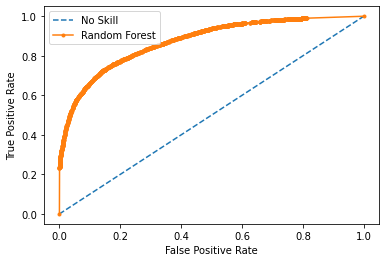

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
rf_proba = rf.predict_proba(x_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
rf_proba = rf_proba[:, 1]
 
# calculate scores
ns_auc = roc_auc_score(y_test, ns_proba)
rf_auc = roc_auc_score(y_test, rf_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

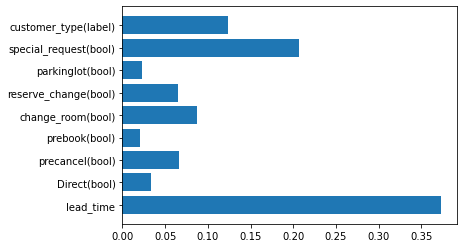

In [19]:
#중요도
plt.barh(x_train.columns, rf.feature_importances_)
plt.show()

Text(50.99999999999999, 0.5, 'True labels\n')

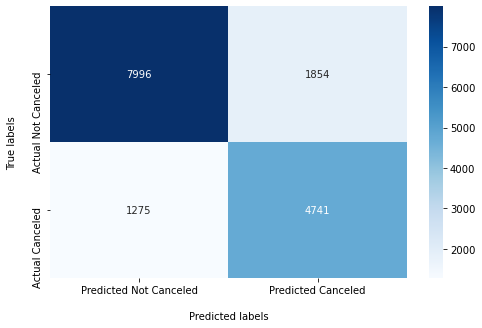

In [20]:
rf_conf = confusion_matrix(y_pred, y_test)
rf_confusion = pd.DataFrame(data=rf_conf, columns=[['Predicted Not Canceled', 'Predicted Canceled']],
                           index = [['Actual Not Canceled', 'Actual Canceled']])
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(rf_confusion, annot=True, fmt='g',cmap="Blues")
ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')

## resort hotel

In [21]:
X = ml_resort_data.drop("is_canceled", 1)
Y = ml_resort_data.loc[:,['is_canceled']]

In [22]:
#인스턴스

rf2 = RandomForestClassifier()

#셋분리
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


#적합화
rf2.fit(X_train,Y_train)


<ipython-input-22-a0683f269b17>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train,Y_train)


RandomForestClassifier()

In [23]:
#예측
y_pred2 = rf2.predict(X_test)

#확률
y_proba2= rf2.predict_proba(X_test)

In [24]:
# 분류모델평가: 정확도, 재현율, 정밀도, f1-점수와 roc_auc 점수
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score
print(f"accuracy_score(정확도):{accuracy_score(Y_test, y_pred2)}")
print(f"recall_score(재현율):{recall_score(Y_test, y_pred2)}")
print(f"precision_score(정밀도):{precision_score(Y_test, y_pred2)}")
print(f"f1_score(f1점수):{f1_score(Y_test, y_pred2)}")
print(f"roc_auc_score:{roc_auc_score(Y_test, y_pred2)}")  #0.5면 랜덤예측 1.0이면 완벽예측

accuracy_score(정확도):0.7914378432351473
recall_score(재현율):0.5392953929539296
precision_score(정밀도):0.6471544715447154
f1_score(f1점수):0.5883222468588323
roc_auc_score:0.71350764818445


In [25]:
print(confusion_matrix(Y_test, y_pred2))

[[5147  651]
 [1020 1194]]


In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

#설명력 R2 : 얼마나 잘 설명하느냐 ? 
print(r2_score(Y_test, y_pred2))

#예측력 MSE 
print(mean_squared_error(Y_test, y_pred2))

# RMSE 예측력 : 해석을 위해서 > 얼마나 잘 맞추었냐 ? 
print(math.sqrt(mean_squared_error(Y_test, y_pred2)))

# MAE : 해석을 위해서
print(mean_absolute_error(Y_test, y_pred2))

-0.042945375987047285
0.2085621567648527
0.4566860593064482
0.2085621567648527


In [27]:
# 분류 보고서를 작성해라
from sklearn.metrics import classification_report
print('              분류 보고서')
print(classification_report(Y_test, y_pred2))

              분류 보고서
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5798
           1       0.65      0.54      0.59      2214

    accuracy                           0.79      8012
   macro avg       0.74      0.71      0.72      8012
weighted avg       0.78      0.79      0.79      8012



No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.847


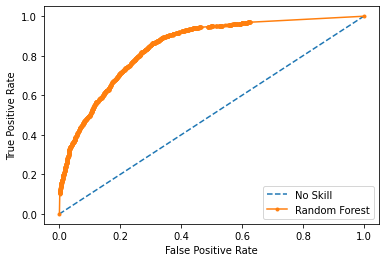

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
rf2_proba = rf2.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns2_proba = [0 for _ in range(len(Y_test))]
 
# keep probabilities for the positive outcome only
rf2_proba = rf2_proba[:, 1]
 
# calculate scores
ns2_auc = roc_auc_score(Y_test, ns2_proba)
rf2_auc = roc_auc_score(Y_test, rf2_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns2_auc))
print('Random Forest: ROC AUC=%.3f' % (rf2_auc))
 
# calculate roc curves
ns2_fpr, ns2_tpr, _ = roc_curve(Y_test, ns2_proba)
rf2_fpr, rf2_tpr, _ = roc_curve(Y_test, rf2_proba)
 
# plot the roc curve for the model
plt.plot(ns2_fpr, ns2_tpr, linestyle='--', label='No Skill')
plt.plot(rf2_fpr, rf2_tpr, marker='.', label='Random Forest')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

Text(50.99999999999999, 0.5, 'True labels\n')

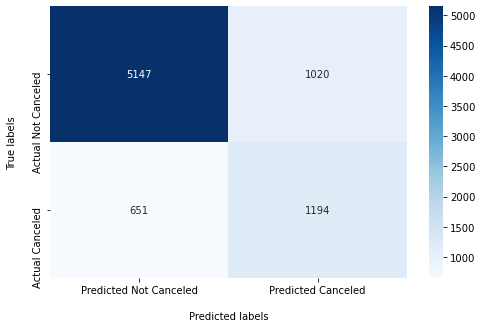

In [29]:
rf_conf = confusion_matrix(y_pred2, Y_test)
rf_confusion = pd.DataFrame(data=rf_conf, columns=[['Predicted Not Canceled', 'Predicted Canceled']],
                           index = [['Actual Not Canceled', 'Actual Canceled']])
fig, ax = plt.subplots(figsize = (8,5))
sns.heatmap(rf_confusion, annot=True, fmt='g',cmap="Blues")
ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')

In [36]:
importances = rf.get_feature_importance(prettified=True)
importances

AttributeError: 'RandomForestClassifier' object has no attribute 'get_feature_importance'

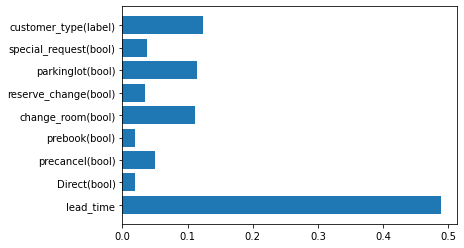

In [34]:
#중요도
plt.barh(X_train.columns, rf2.feature_importances_)
plt.show()